In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read df from CSV file
df = pd.read_csv('/content/Suicides in India 2001-2012.csv')

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [6]:
df.shape

(237519, 7)

In [7]:
df.duplicated().sum()

0

In [8]:
df['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

In [9]:
# Renaming States
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [10]:
# Dropping unnecessary rows

df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') |
               (df.State == 'Total (States)')].index)

In [11]:
df.to_csv('Indian_Suicides.csv', index=False)

In [12]:
df.shape

(236583, 7)

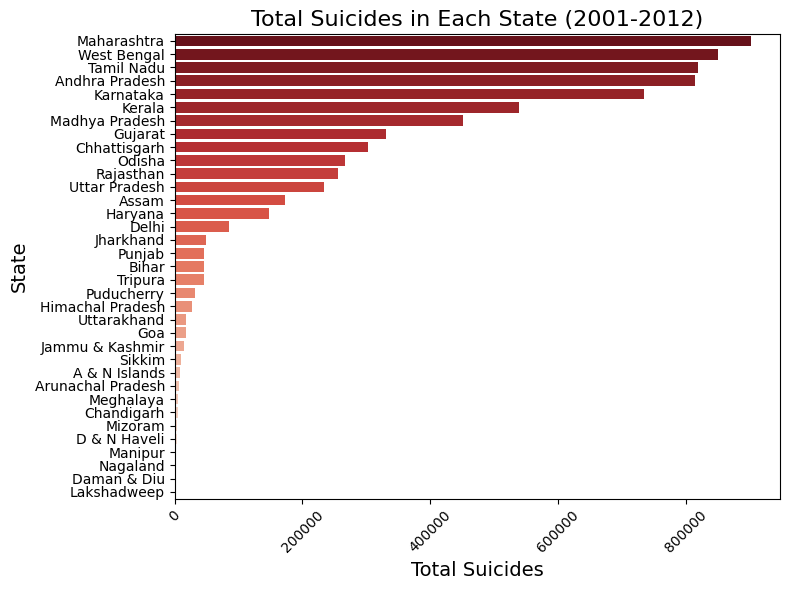

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Grouping by 'State' and calculating the total number of suicides for each state
statewise_suicides = df.groupby('State')['Total'].sum()
statewise_suicides_df = statewise_suicides.reset_index()
statewise_suicides_df.rename(columns={'Total': 'Total Suicides'}, inplace=True)

# Sorting the data in descending order of total suicides
sorted_suicides_df = statewise_suicides_df.sort_values(by='Total Suicides', ascending=False)

# Reversing the color palette from dark red to light red
reversed_palette = sns.color_palette("Reds_r", len(sorted_suicides_df))

# Creating the bar plot with the reversed color palette
plt.figure(figsize=(8, 6))
sns.barplot(x='Total Suicides', y='State', data=sorted_suicides_df, palette=reversed_palette)

plt.title('Total Suicides in Each State (2001-2012)', fontsize=16)
plt.xlabel('Total Suicides', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


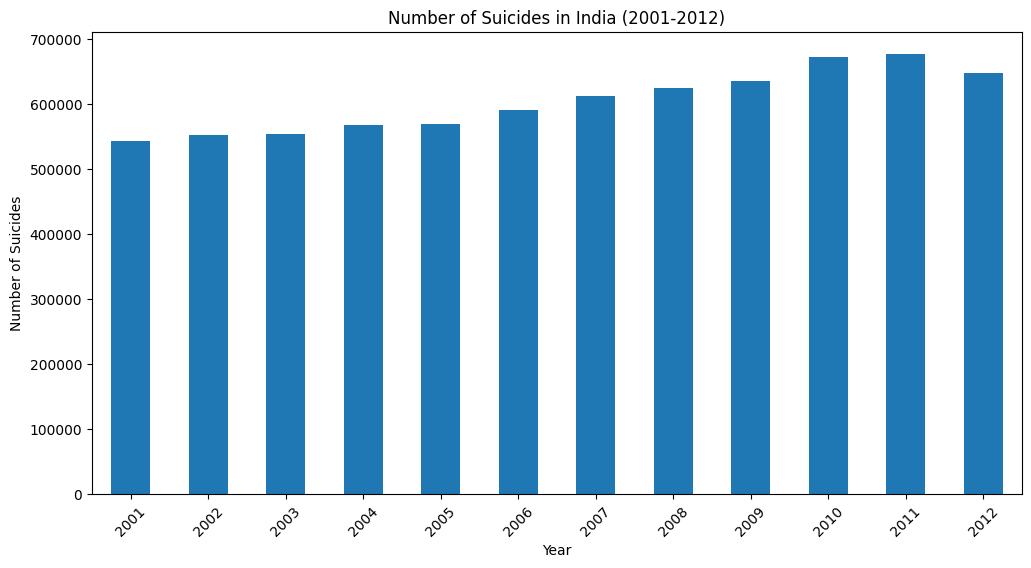

In [14]:
# Grouping the data by year and summing the total suicides
yearly_suicides = df.groupby('Year')['Total'].sum()

# Plotting the data
plt.figure(figsize=(12, 6))
yearly_suicides.plot(kind='bar')
plt.title('Number of Suicides in India (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45)


# Show the plot
plt.show()


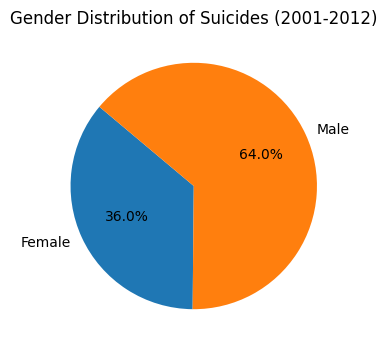

,Gender,Total Suicides
0,Female,2606922
1,Male,4641088


In [15]:
# Grouping the data by 'Gender' and calculating the total number of suicides for each gender
genderwise_suicides = df.groupby('Gender')['Total'].sum()

# Converting the result to a DataFrame for better readability
genderwise_suicides_df = genderwise_suicides.reset_index()
genderwise_suicides_df.rename(columns={'Total': 'Total Suicides'}, inplace=True)

# Creating the pie chart
plt.figure(figsize=(4, 4))
plt.pie(genderwise_suicides_df['Total Suicides'], labels=genderwise_suicides_df['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Suicides (2001-2012)')

# Show the plot
plt.show()

genderwise_suicides_df.head()


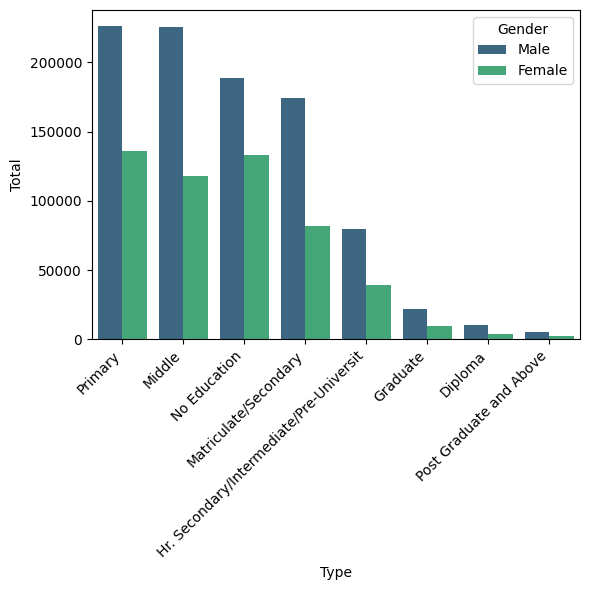

In [16]:
eduDf = df[df['Type_code']=='Education_Status']
plt.figure(figsize=(6,6))
eduDf = eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

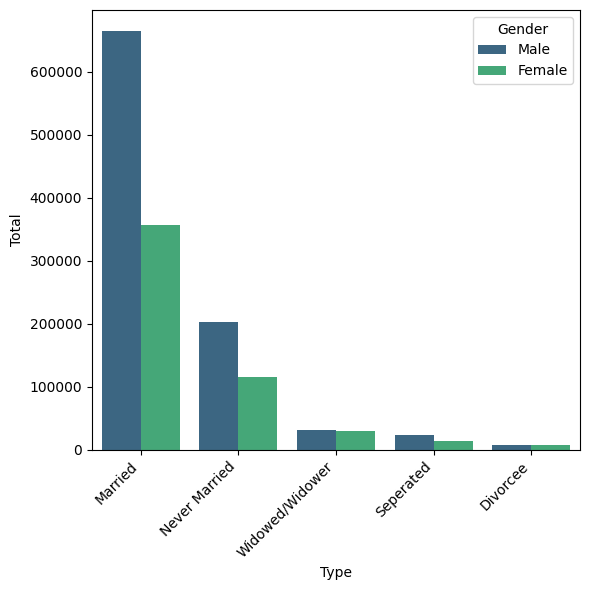

In [17]:
plt.figure(figsize=(6,6))
socialDf = df[df['Type_code']=='Social_Status']
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

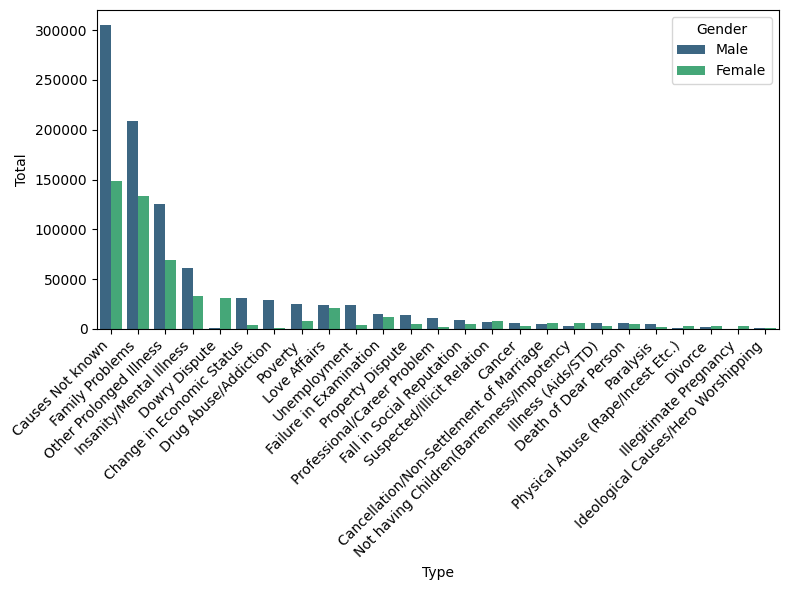

In [18]:
causesDf = df[df['Type_code']=='Causes']
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(8,6))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()